# importing libraries


In [1]:
import pandas as pd #data manipulation and analysis, particularly for working with structured data (like CSV files).
import numpy as np #Provides support for arrays and mathematical functions
import matplotlib.pyplot as plt #visualizations.
import seaborn as sns #making attractive and informative statistical graphics.

In [2]:
url = "C:\\Users\\91812\\Downloads\\StockDataBANKBARODA_1.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-03-06T09:15:00+0530,173.55,174.45,173.15,174.35,997805
1,1,2023-03-06T09:20:00+0530,174.30,174.50,173.70,174.30,750498
2,2,2023-03-06T09:25:00+0530,174.30,174.45,173.55,174.45,483941
3,3,2023-03-06T09:30:00+0530,174.45,174.90,174.25,174.80,793743
4,4,2023-03-06T09:35:00+0530,174.80,175.20,174.50,175.05,874142


## Data Preprocessing

In [3]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Unnamed: 0,Open,High,Low,Close,Volume
Date,,,,,,
2023-03-06 09:15:00+05:30,0,173.55,174.45,173.15,174.35,997805
2023-03-06 09:20:00+05:30,1,174.30,174.50,173.70,174.30,750498
2023-03-06 09:25:00+05:30,2,174.30,174.45,173.55,174.45,483941
2023-03-06 09:30:00+05:30,3,174.45,174.90,174.25,174.80,793743
2023-03-06 09:35:00+05:30,4,174.80,175.20,174.50,175.05,874142


## Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

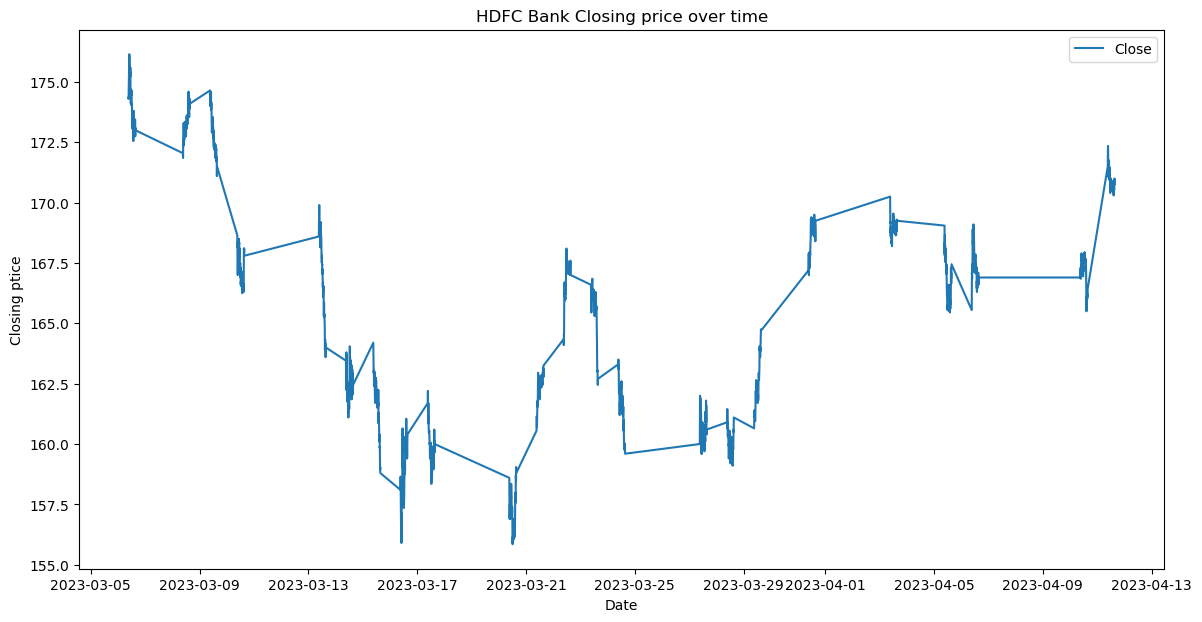

In [4]:
plt.figure(figsize=(14, 7)) # Creates a new figure for the plot with a specified size.
plt.plot(df.index, df['Close'],label='Close')
plt.title('HDFC Bank Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show

In [ ]:
#It visually represents how the stock price fluctuated during that time.

<function matplotlib.pyplot.show(close=None, block=None)>

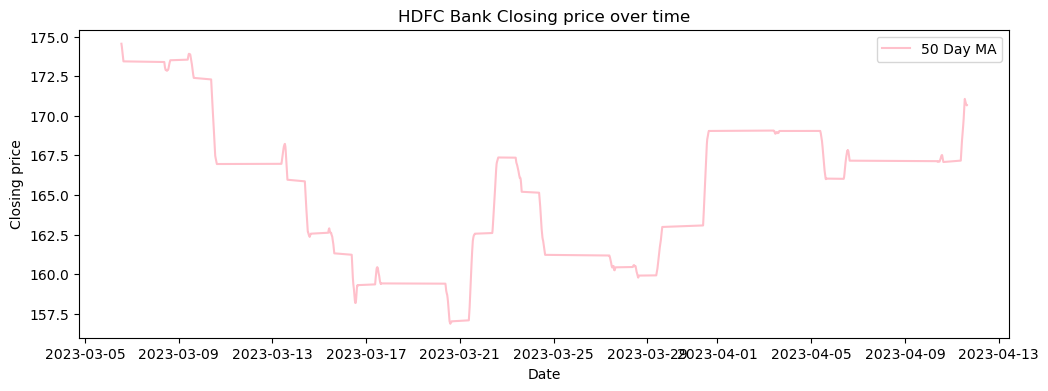

In [5]:
#Calculating Moving Averages (50-day and 200-day)
df['50ma'] = df['Close'].rolling(window=50).mean()
df['200ma'] = df['Close'].rolling(window=200).mean()
#Plotting the 50-Day Moving Average , This is the average closing price of a stock over the past 50 days.
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['50ma'], label='50 Day MA',color='pink')
plt.title('HDFC Bank Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show

In [ ]:
#The 50-day moving average shows a smoother downward trend overall.
#This suggests that, on average, the stock was declining during the observed period,
#although short-term fluctuations are still evident.


<function matplotlib.pyplot.show(close=None, block=None)>

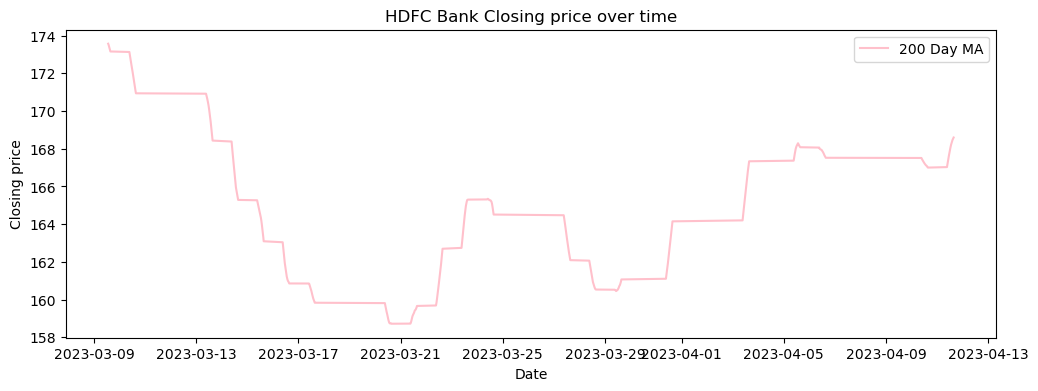

In [6]:
#Plotting the 200-Day Moving Average, This is the average closing price of a stock over the past 200 days.
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['200ma'], label='200 Day MA',color='pink')
plt.title('HDFC Bank Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show

In [ ]:
#The 200-day moving average also indicates a downward trend, 
#though it is smoother and less reactive to short-term price changes compared to the 50-day moving average.
#The smoother line suggests that over a longer period, the stock has been underperforming, indicating a bearish trend.

<function matplotlib.pyplot.show(close=None, block=None)>

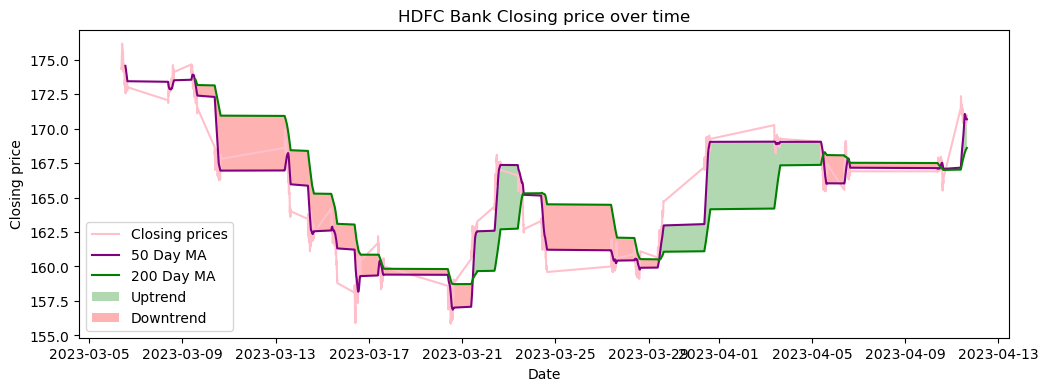

In [8]:
#Plotting All Together (Closing Prices, 50-Day MA, 200-Day MA)
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Close'], label='Closing prices',color='pink')
plt.plot(df.index, df['50ma'], label='50 Day MA',color='purple')
plt.plot(df.index, df['200ma'], label='200 Day MA',color='green')
#shading upward trend when(50ma>200ma), can invest in stocks
plt.fill_between(df.index, df['50ma'], df['200ma'], where=(df['50ma'] > df['200ma']), facecolor='green', alpha=0.3,label='Uptrend')
#shading downward trend when(50ma<200ma)
plt.fill_between(df.index, df['50ma'], df['200ma'], where=(df['50ma'] < df['200ma']), facecolor='red', alpha=0.3,label='Downtrend')
plt.title('HDFC Bank Closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show